# Project: No-show appointments - [KaggleV2-May-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://www.kaggle.com/joniarroba/noshowappointments). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

#### Data Dictionary

01 - PatientId:Identification of a patient

02 - AppointmentID:Identification of each appointment

03 - Gender:Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - DataMarcacaoConsulta:The day of the actuall appointment, when they have to visit the doctor.

05 - DataAgendamento:The day someone called or registered the appointment, this is before appointment of course.

06 - Age:How old is the patient.
   
07 - Neighbourhood:Where the appointment takes place.

08 - Scholarship:True of False . Observation, this is a broad topic, consider reading this article 
https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

09 - Hipertension:True or False

10 - Diabetes:True or False

Alcoholism:True or False

Handcap:True or False

SMS_received:1 or more messages sent to the patient.

No-show:True or False.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### Gathering Data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')


In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
110522,2.570000e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.600000e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.560000e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.210000e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.780000e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Assessing Data 

In [5]:
# return number of columns and number of row
df.shape

(110527, 14)

In [6]:
#return number of dimensions of data
df.ndim

2

In [7]:
#return types of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
Noshow             object
dtype: object

In [8]:
# return size of Dataset which is a multiplication of number of rows and number of columns
df.size

1547378

In [9]:
#return number of non-null-value and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Noshow            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
#return number of unique value
df.nunique()

PatientId           6100
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
Noshow                 2
dtype: int64

In [11]:
# return which value is nul or not for each element in DataSet 
df.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# return which value is nul or not for each columns in DataSet 
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
Noshow            False
dtype: bool

In [13]:
#return number of columns has a null value
df.isnull().any().sum()

0

In [14]:
#return number of null value for each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Noshow            0
dtype: int64

In [15]:
#return a number of cell has a null value
df.isnull().sum().sum()

0

In [16]:
#return statistical descriptive of dataset for each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

1.duplicated data

2.missing value

3.incorrect datatype

In [17]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [18]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
Noshow             object
dtype: object

In [19]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [20]:
#check for duplicated data
sum(df.duplicated())

0

In [21]:
# if we have duplicated data we remove it
df.drop_duplicates(inplace = True)

In [22]:
sum(df.duplicated())

0

In [23]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [24]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [25]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
Noshow                         object
dtype: object

In [26]:
df.Noshow.count()

110527

In [27]:
df.Noshow.value_counts()

No     88208
Yes    22319
Name: Noshow, dtype: int64

In [28]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

#### non_dublicated data....non_missing value....non incorrect datatype

In [29]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


df.drop(['PatientId','AppointmentID','Gender','AppointmentDay','Age'] , axis =1 , inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? Exploraty Data Analysis 

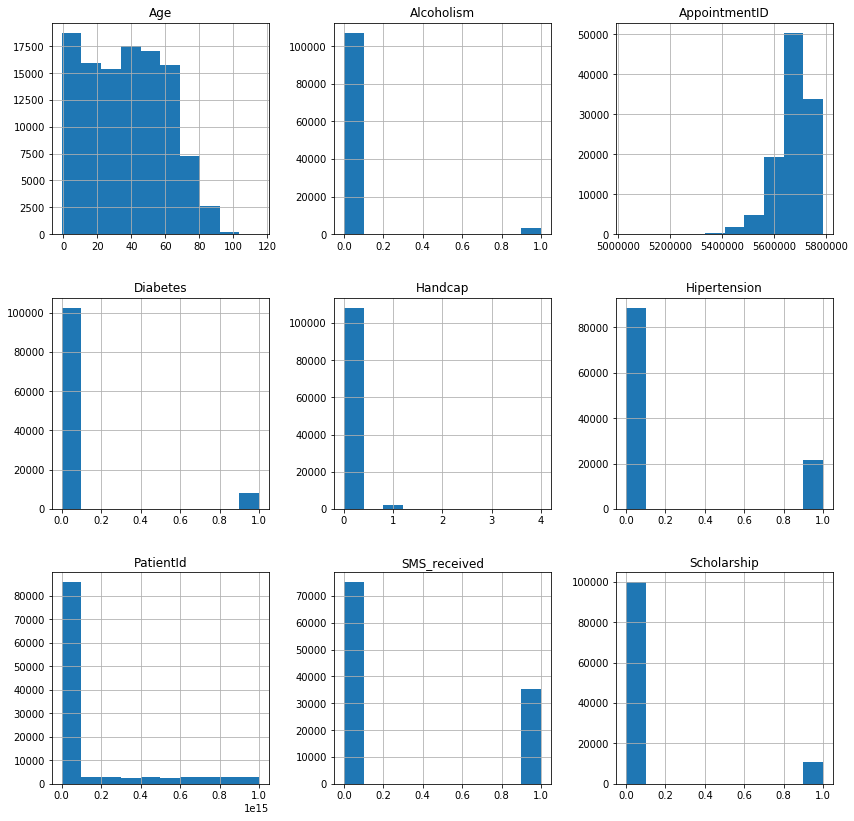

In [30]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize = (14,14));

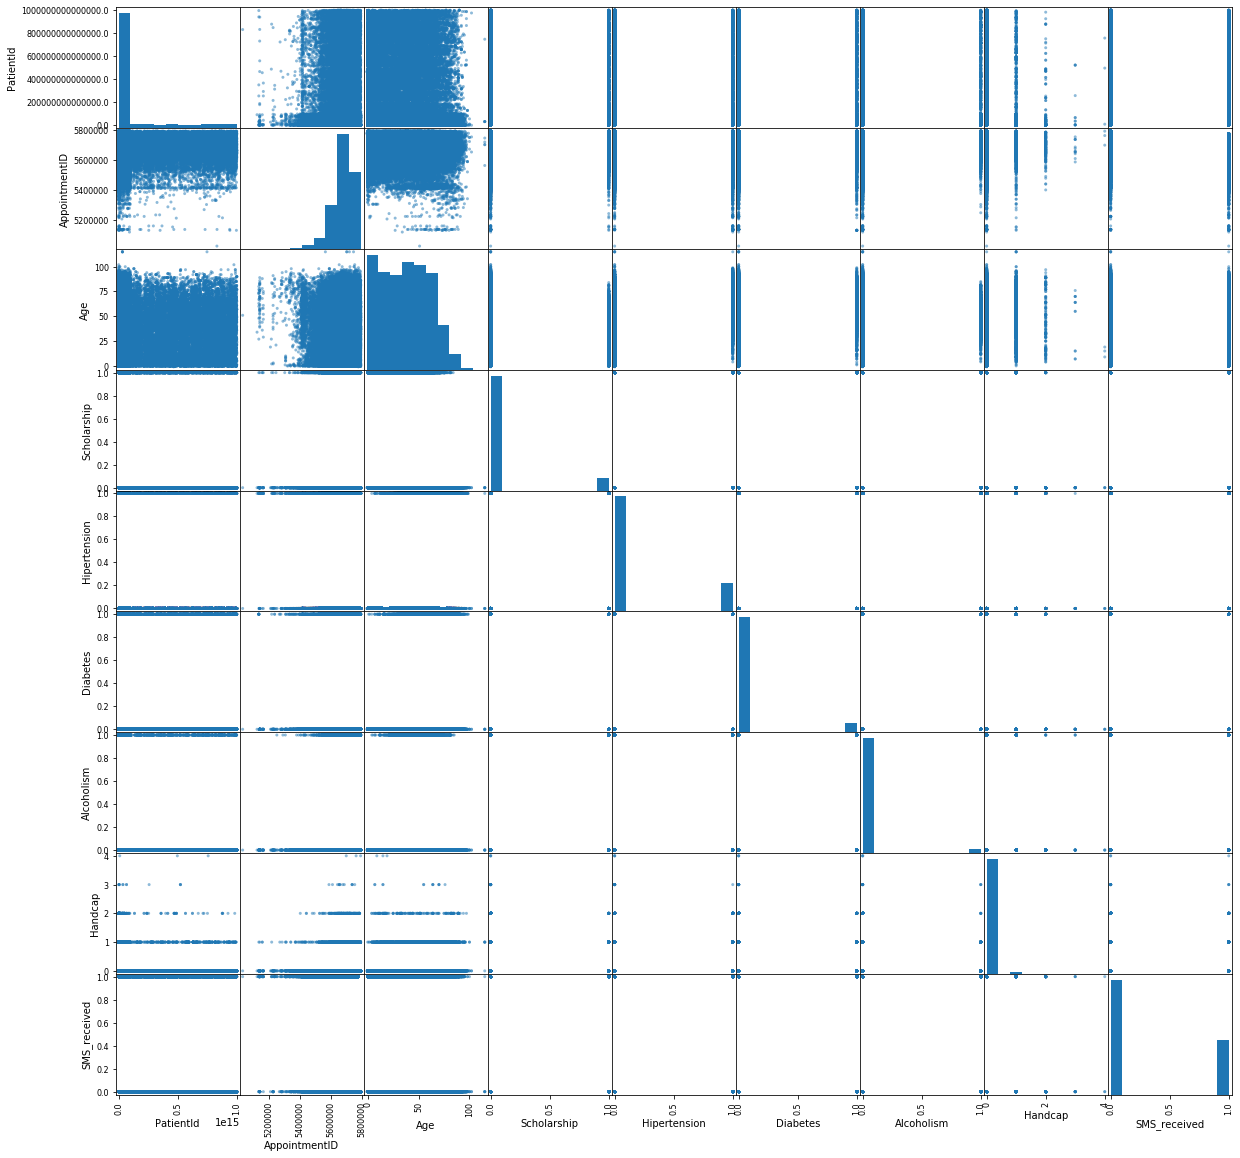

In [31]:
pd.plotting.scatter_matrix(df, figsize = (20,20));

In [32]:
df.Scholarship.count()

110527

In [33]:
df.Scholarship.sum()

10861

In [34]:
df.Scholarship.describe()

count    110527.000000
mean          0.098266
std           0.297675
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64

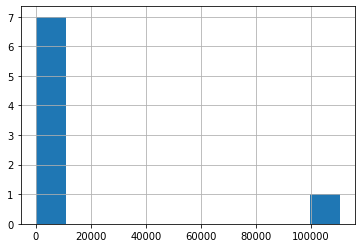

In [35]:
df.Scholarship.describe().hist();

In [36]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

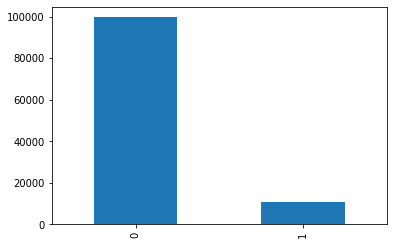

In [37]:
df.Scholarship.value_counts().plot(kind='bar');

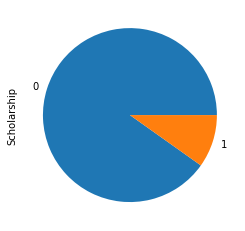

In [38]:
df.Scholarship.value_counts().plot(kind='pie');

In [39]:
schol = df.Scholarship == True
schol.sum()

10861

In [40]:
schol.mean()

0.09826558216544373

In [41]:
nonschol = df.Scholarship == False
nonschol.sum()

99666

In [42]:
nonschol.mean()

0.9017344178345562

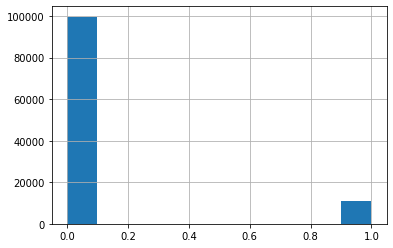

In [43]:
df.Scholarship.hist();

In [44]:
df.Age.count()

110527

In [45]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

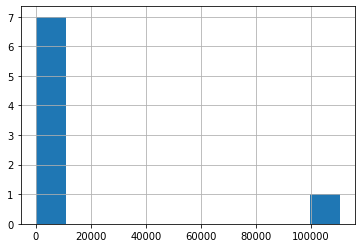

In [46]:
df.Age.describe().hist();

In [47]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

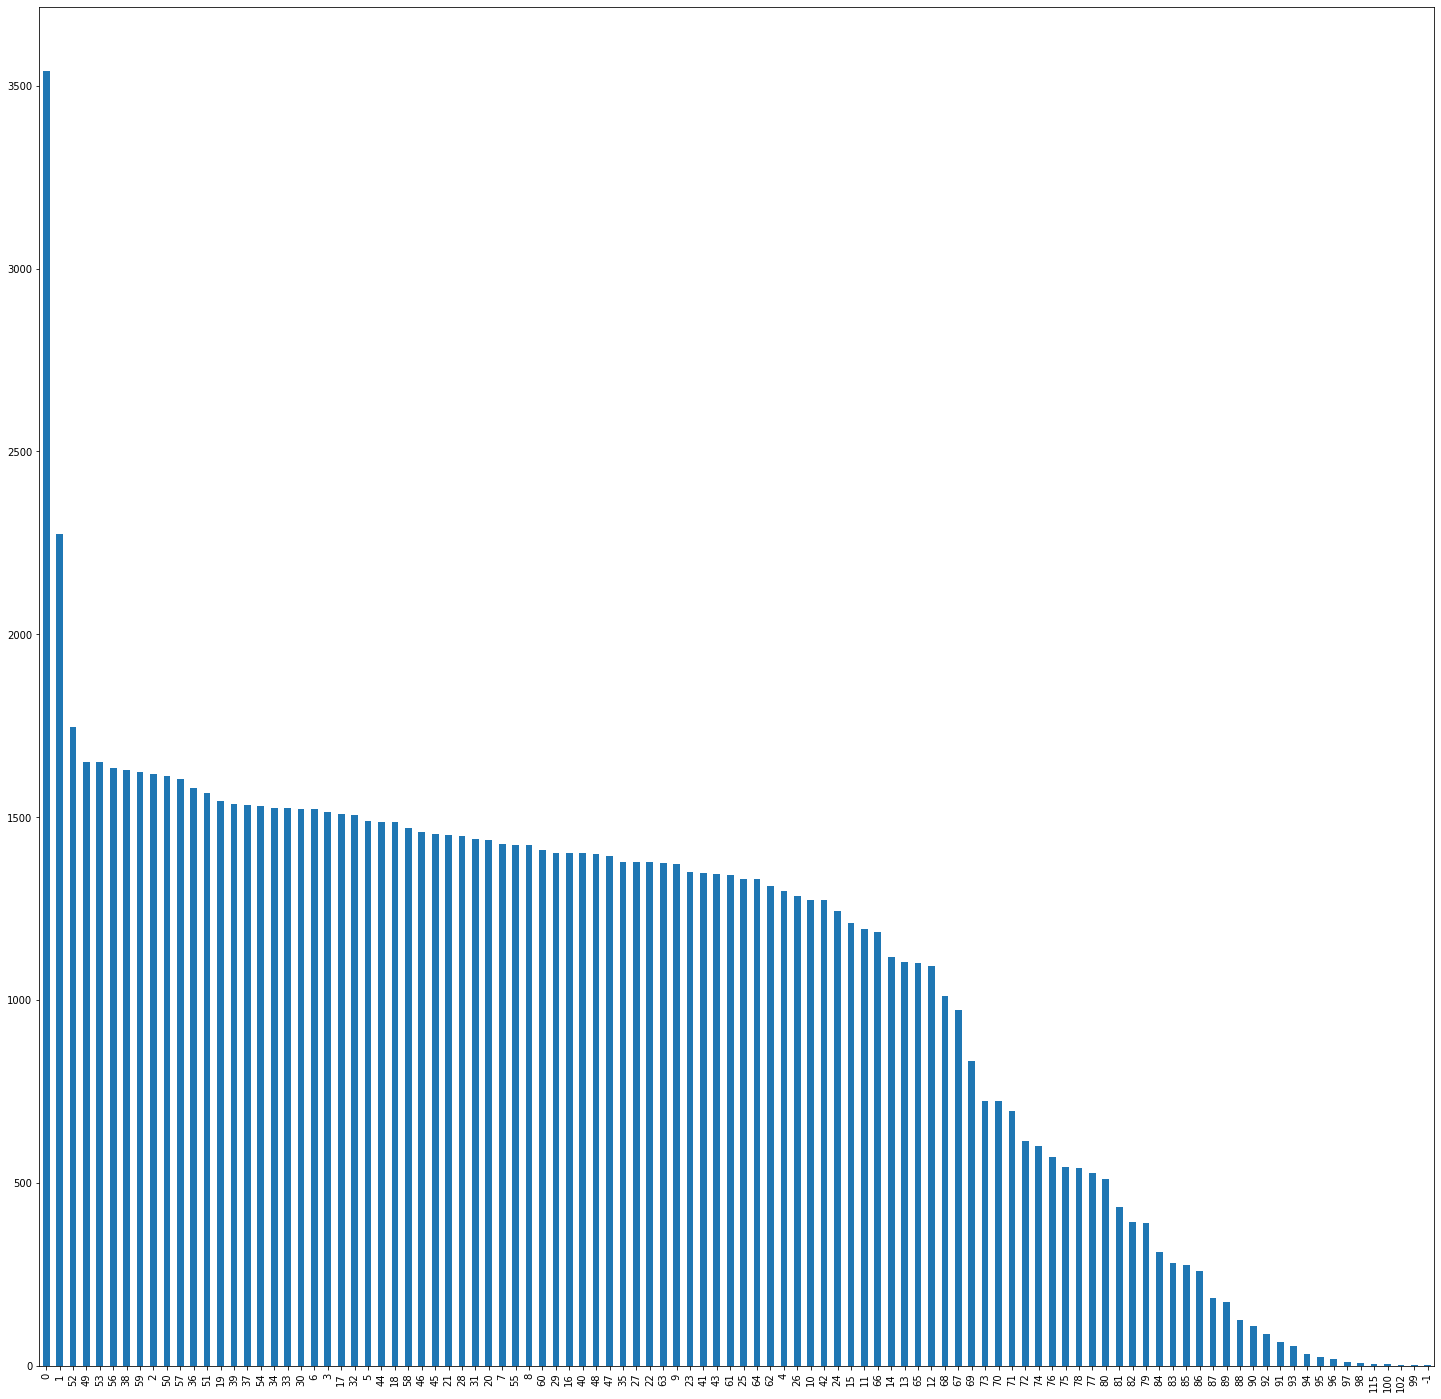

In [48]:
df.Age.value_counts().plot(kind='bar',figsize=(25,25));

In [49]:
df.Age.sum() 

4099322

In [50]:
df.Age.mean()

37.08887421173107

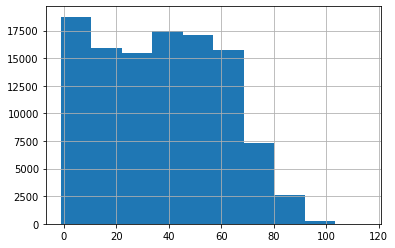

In [51]:
df.Age.hist();

In [52]:
df.Hipertension.count()

110527

In [53]:
df.Hipertension.describe()

count    110527.000000
mean          0.197246
std           0.397921
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Hipertension, dtype: float64

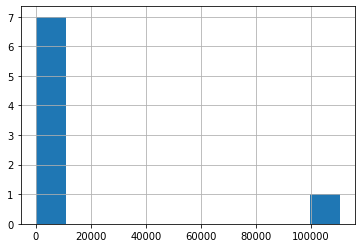

In [54]:
df.Hipertension.describe().hist();

In [55]:
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

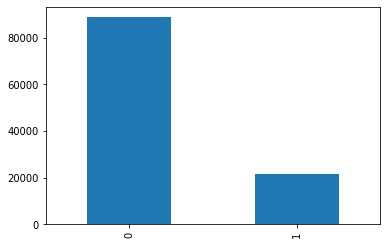

In [56]:
df.Hipertension.value_counts().plot(kind='bar');

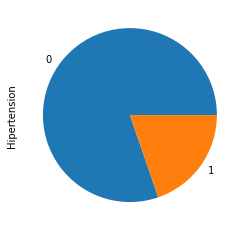

In [57]:
df.Hipertension.value_counts().plot(kind='pie');

In [58]:
df.Hipertension.sum() 

21801

In [59]:
df.Hipertension.mean()

0.1972459218109602

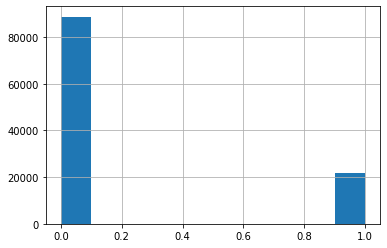

In [60]:
df.Hipertension.hist();

In [61]:
df.Diabetes.count()

110527

In [62]:
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

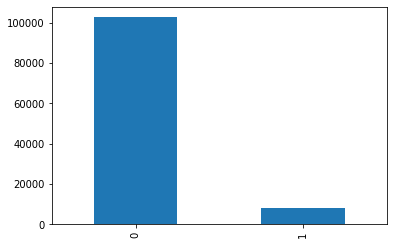

In [63]:
df.Diabetes.value_counts().plot(kind='bar');

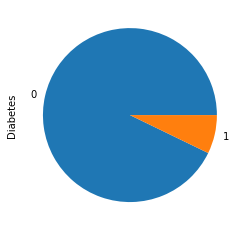

In [64]:
df.Diabetes.value_counts().plot(kind='pie');

In [65]:
df.Diabetes.sum() 

7943

In [66]:
df.Diabetes.mean()

0.07186479321794674

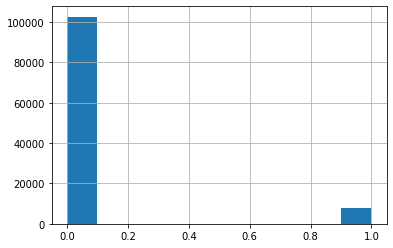

In [67]:
df.Diabetes.hist();

In [68]:
df.Alcoholism.count()

110527

In [69]:
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

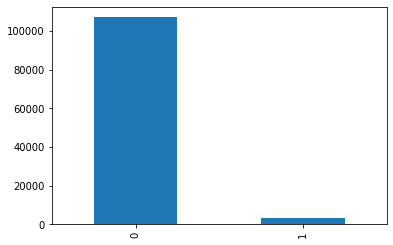

In [70]:
df.Alcoholism.value_counts().plot(kind='bar');

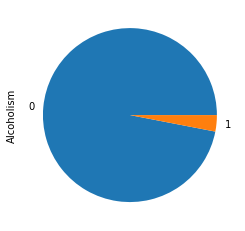

In [71]:
df.Alcoholism.value_counts().plot(kind='pie');

In [72]:
df.Alcoholism.sum() 

3360

In [73]:
df.Alcoholism.mean()

0.030399811810688793

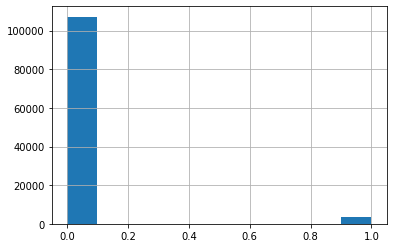

In [74]:
df.Alcoholism.hist();

In [75]:
df.Handcap.count()

110527

In [76]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

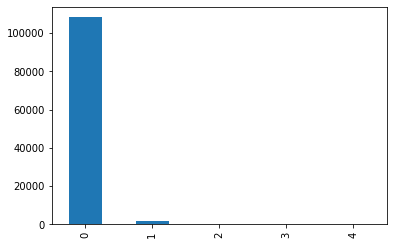

In [77]:
df.Handcap.value_counts().plot(kind='bar');

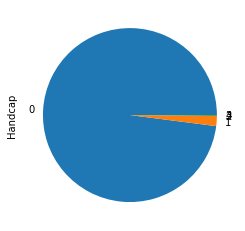

In [78]:
df.Handcap.value_counts().plot(kind='pie');

In [79]:
df.Handcap.sum() 

2459

In [80]:
df.Handcap.mean()

0.022247957512643968

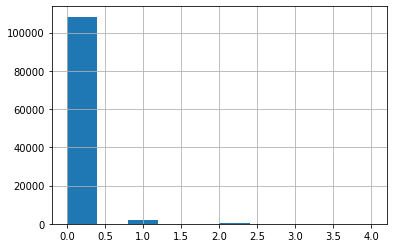

In [81]:
df.Handcap.hist();

In [82]:
df.SMS_received.count()

110527

In [83]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [84]:
df.SMS_received.sum() 

35482

In [85]:
df.SMS_received.mean()

0.32102563174608917

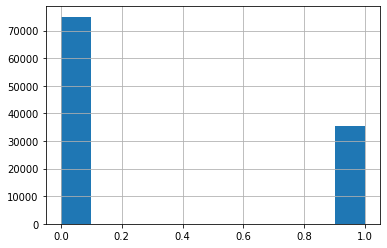

In [86]:
df.SMS_received.hist();

In [87]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].mean()

,Hipertension,Alcoholism,Handcap,Diabetes,Scholarship
Noshow,,,,,
No,0.204392,0.030417,0.022742,0.073837,0.093903
Yes,0.169004,0.030333,0.020297,0.064071,0.115507


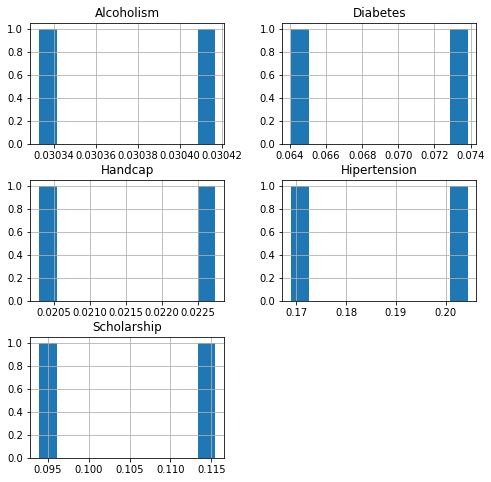

In [88]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].mean().hist(figsize=(8,8));

In [89]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].count()

,Hipertension,Alcoholism,Handcap,Diabetes,Scholarship
Noshow,,,,,
No,88208,88208,88208,88208,88208
Yes,22319,22319,22319,22319,22319


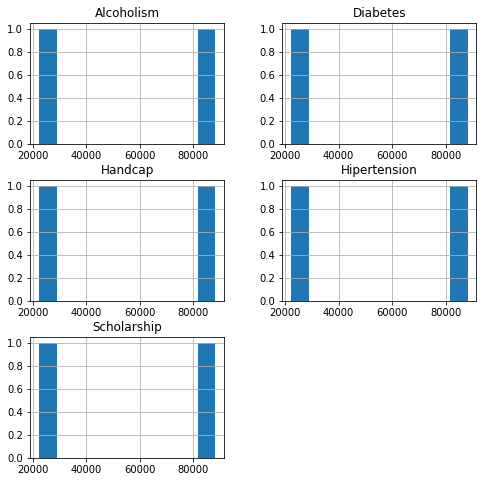

In [90]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].count().hist(figsize=(8,8));

In [91]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].sum()

,Hipertension,Alcoholism,Handcap,Diabetes,Scholarship
Noshow,,,,,
No,18029,2683,2006,6513,8283
Yes,3772,677,453,1430,2578


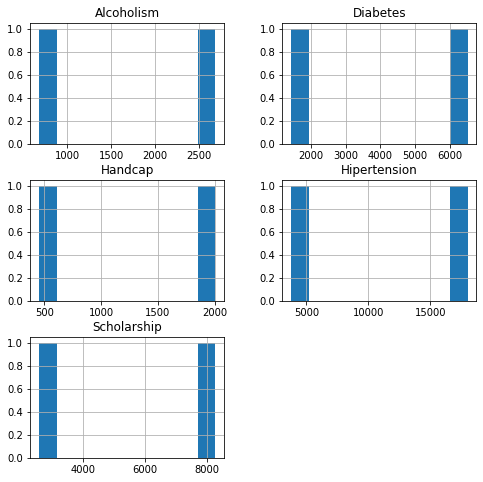

In [92]:
df.groupby(['Noshow'])['Hipertension','Alcoholism','Handcap','Diabetes','Scholarship'].sum().hist(figsize=(8,8));

In [93]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].mean()

,Hipertension,Alcoholism,Handcap,Diabetes
Scholarship,,,,
0,0.199837,0.028415,0.022706,0.073987
1,0.173465,0.048614,0.018046,0.052389


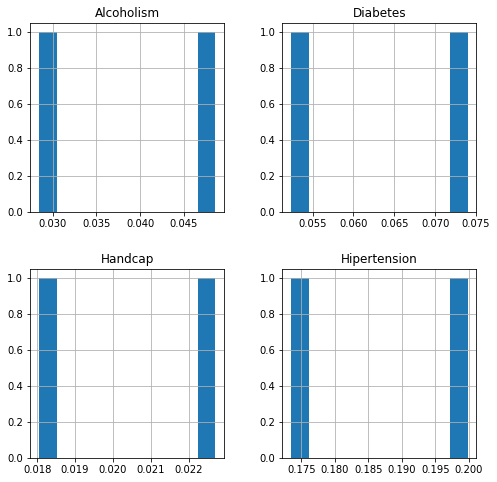

In [94]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].mean().hist(figsize=(8,8));

In [95]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].sum()

,Hipertension,Alcoholism,Handcap,Diabetes
Scholarship,,,,
0,19917,2832,2263,7374
1,1884,528,196,569


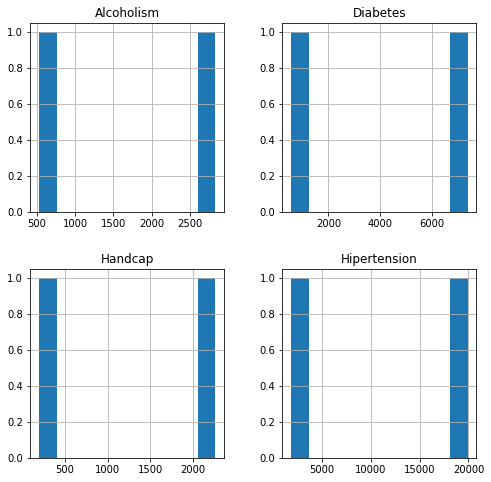

In [96]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].sum().hist(figsize=(8,8));

In [97]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].count()

,Hipertension,Alcoholism,Handcap,Diabetes
Scholarship,,,,
0,99666,99666,99666,99666
1,10861,10861,10861,10861


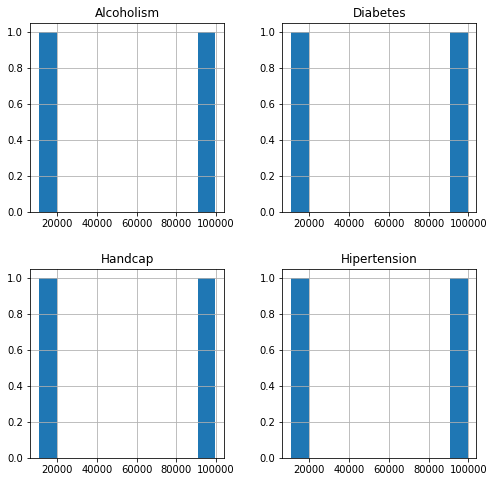

In [98]:
df.groupby(['Scholarship'])['Hipertension','Alcoholism','Handcap','Diabetes'].count().hist(figsize=(8,8));

In [99]:
df.groupby(['Diabetes'])['Hipertension'].mean()

Diabetes
0    0.149292
1    0.816568
Name: Hipertension, dtype: float64

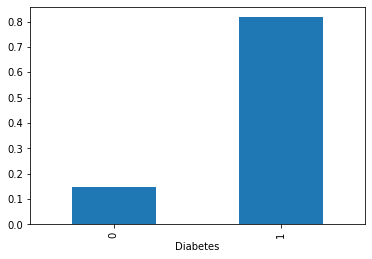

In [100]:
df.groupby(['Diabetes'])['Hipertension'].mean().plot(kind = 'bar');

In [101]:
df.groupby(['Alcoholism'])['Handcap'].mean()

Alcoholism
0    0.022115
1    0.026488
Name: Handcap, dtype: float64

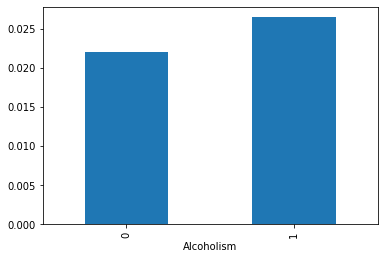

In [102]:
df.groupby(['Alcoholism'])['Handcap'].mean().plot(kind = 'bar');

In [103]:
df.groupby(['SMS_received'])['Scholarship'].mean()

SMS_received
0    0.098021
1    0.098782
Name: Scholarship, dtype: float64

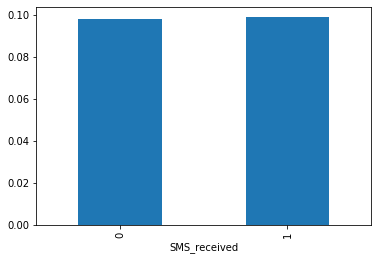

In [104]:
df.groupby(['SMS_received'])['Scholarship'].mean().plot(kind = 'bar');

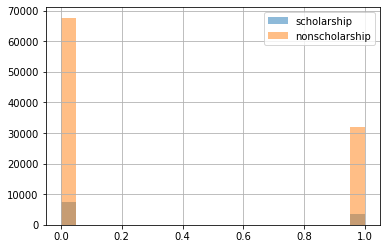

In [105]:
df.SMS_received[schol].hist(alpha =0.5 , bins =20 , label = 'scholarship');
df.SMS_received[nonschol].hist(alpha =0.5 , bins=20 , label = 'nonscholarship');
plt.legend();

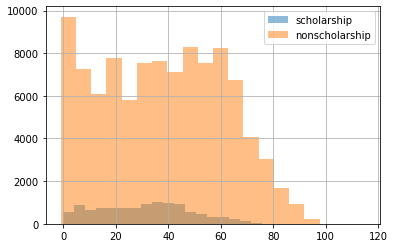

In [106]:
df.Age[schol].hist(alpha =0.5 , bins =20 , label = 'scholarship');
df.Age[nonschol].hist(alpha =0.5 , bins=20 , label = 'nonscholarship');
plt.legend();

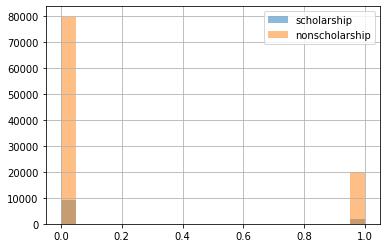

In [107]:
df.Hipertension[schol].hist(alpha =0.5 , bins =20 , label = 'scholarship');
df.Hipertension[nonschol].hist(alpha =0.5 , bins=20 , label = 'nonscholarship');
plt.legend();

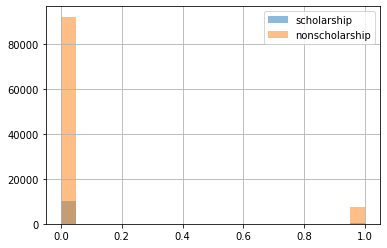

In [108]:
df.Diabetes[schol].hist(alpha =0.5 , bins =20 , label = 'scholarship');
df.Diabetes[nonschol].hist(alpha =0.5 , bins=20 , label = 'nonscholarship');
plt.legend();

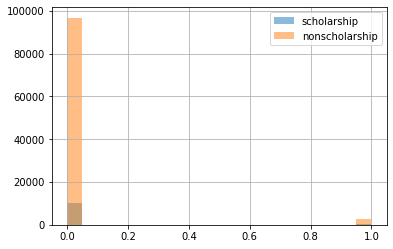

In [109]:
df.Alcoholism[schol].hist(alpha =0.5 , bins =20 , label = 'scholarship');
df.Alcoholism[nonschol].hist(alpha =0.5 , bins=20 , label = 'nonscholarship');
plt.legend();

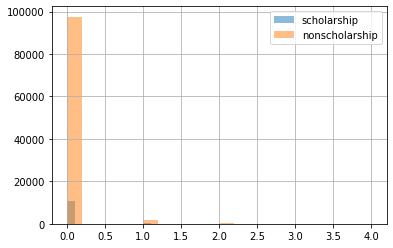

In [110]:
df.Handcap[schol].hist(alpha =0.5 , bins =20 , label = 'scholarship');
df.Handcap[nonschol].hist(alpha =0.5 , bins=20 , label = 'nonscholarship');
plt.legend();

In [111]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

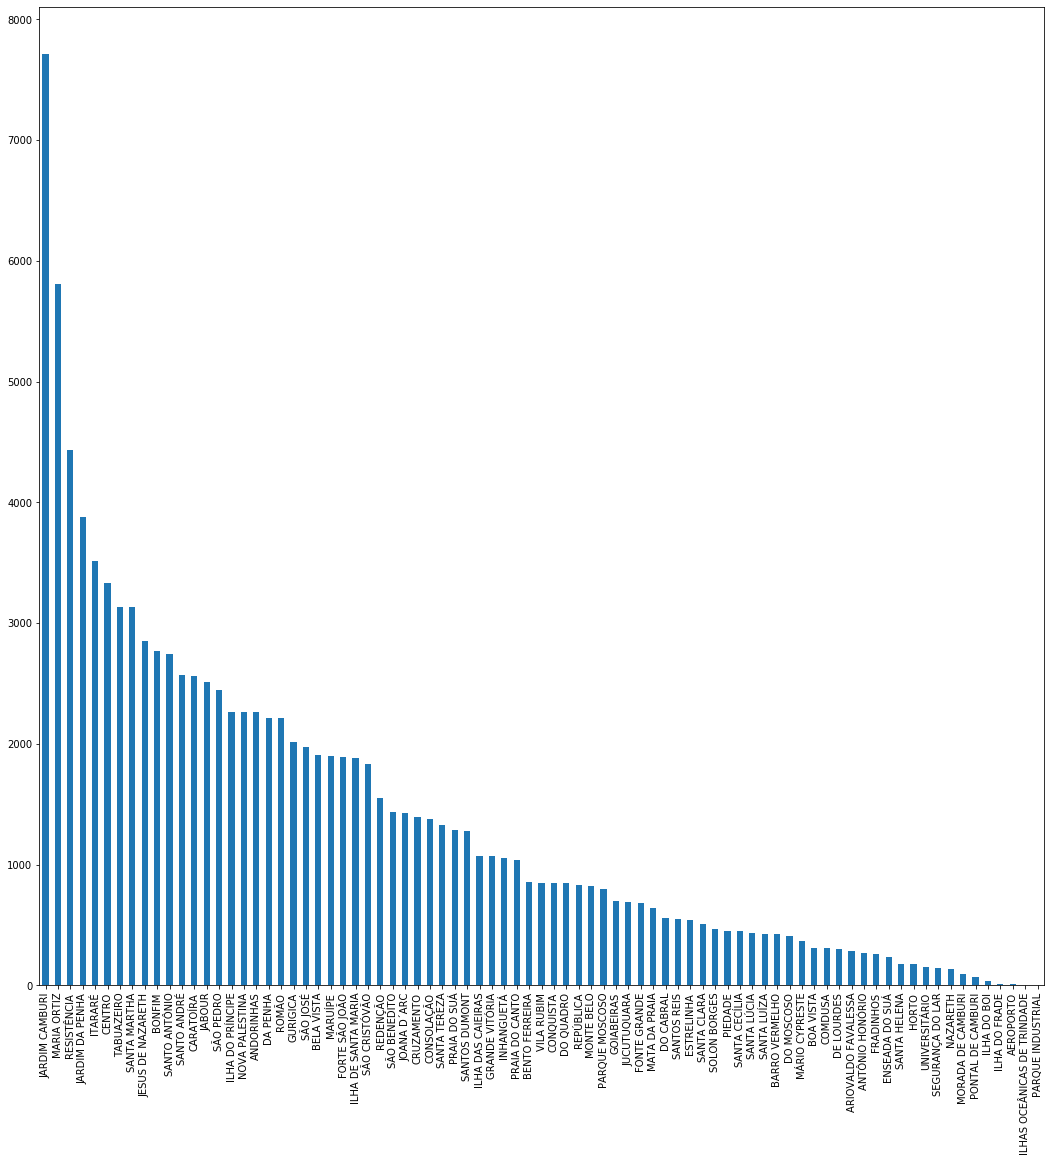

In [112]:
df.Neighbourhood.value_counts().plot(kind='bar',figsize=(18,18));

In [113]:
df.Neighbourhood.count()

110527

In [114]:
df.Neighbourhood.describe()

count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: Neighbourhood, dtype: object

In [115]:
df.ScheduledDay.value_counts()

2016-05-06 07:09:54+00:00    24
2016-05-06 07:09:53+00:00    23
2016-04-25 17:18:27+00:00    22
2016-04-25 17:17:46+00:00    22
2016-04-25 17:17:23+00:00    19
                             ..
2016-04-25 08:45:17+00:00     1
2016-05-02 08:09:10+00:00     1
2016-05-12 11:16:29+00:00     1
2016-05-24 11:35:37+00:00     1
2016-05-19 16:59:13+00:00     1
Name: ScheduledDay, Length: 103549, dtype: int64

In [116]:
df.ScheduledDay.describe()

count                        110527
unique                       103549
top       2016-05-06 07:09:54+00:00
freq                             24
first     2015-11-10 07:13:56+00:00
last      2016-06-08 20:07:23+00:00
Name: ScheduledDay, dtype: object

In [117]:
df.AppointmentDay.describe()

count                        110527
unique                           27
top       2016-06-06 00:00:00+00:00
freq                           4692
first     2016-04-29 00:00:00+00:00
last      2016-06-08 00:00:00+00:00
Name: AppointmentDay, dtype: object

In [118]:
df.Noshow.value_counts()

No     88208
Yes    22319
Name: Noshow, dtype: int64

In [119]:
df.Noshow.value_counts()[0]

88208

In [120]:
no = df.Noshow.value_counts()[0]

In [121]:
no

88208

In [122]:
df.Noshow.value_counts()[1]

22319

In [123]:
yes = df.Noshow.value_counts()[1]

In [124]:
yes

22319

In [125]:
type(yes)

numpy.int64

In [126]:
yes = int(yes)

In [127]:
type(yes)

int

In [128]:
no = int(no)

In [129]:
type(no)

int

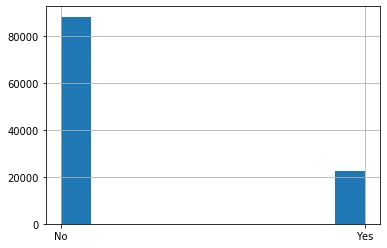

In [130]:
df.Noshow.hist();

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [131]:
df_no = df[df['Noshow'] == 'No']
df_yes = df[df['Noshow'] == 'Yes']

In [132]:
ind = df_no['Scholarship'].value_counts().index
df_no['Scholarship'].value_counts()

0    79925
1     8283
Name: Scholarship, dtype: int64

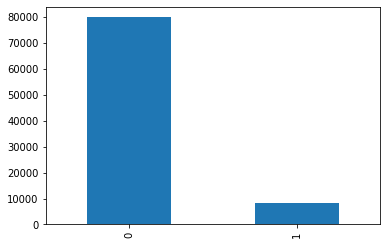

In [133]:
df_no['Scholarship'].value_counts()[ind].plot(kind = 'bar');

In [134]:
df_yes['Scholarship'].value_counts()

0    19741
1     2578
Name: Scholarship, dtype: int64

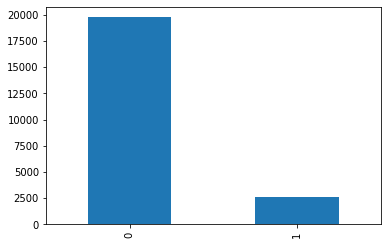

In [135]:
df_yes['Scholarship'].value_counts()[ind].plot(kind = 'bar');

In [136]:
ind = df_yes['Neighbourhood'].value_counts().index
df_yes['Neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

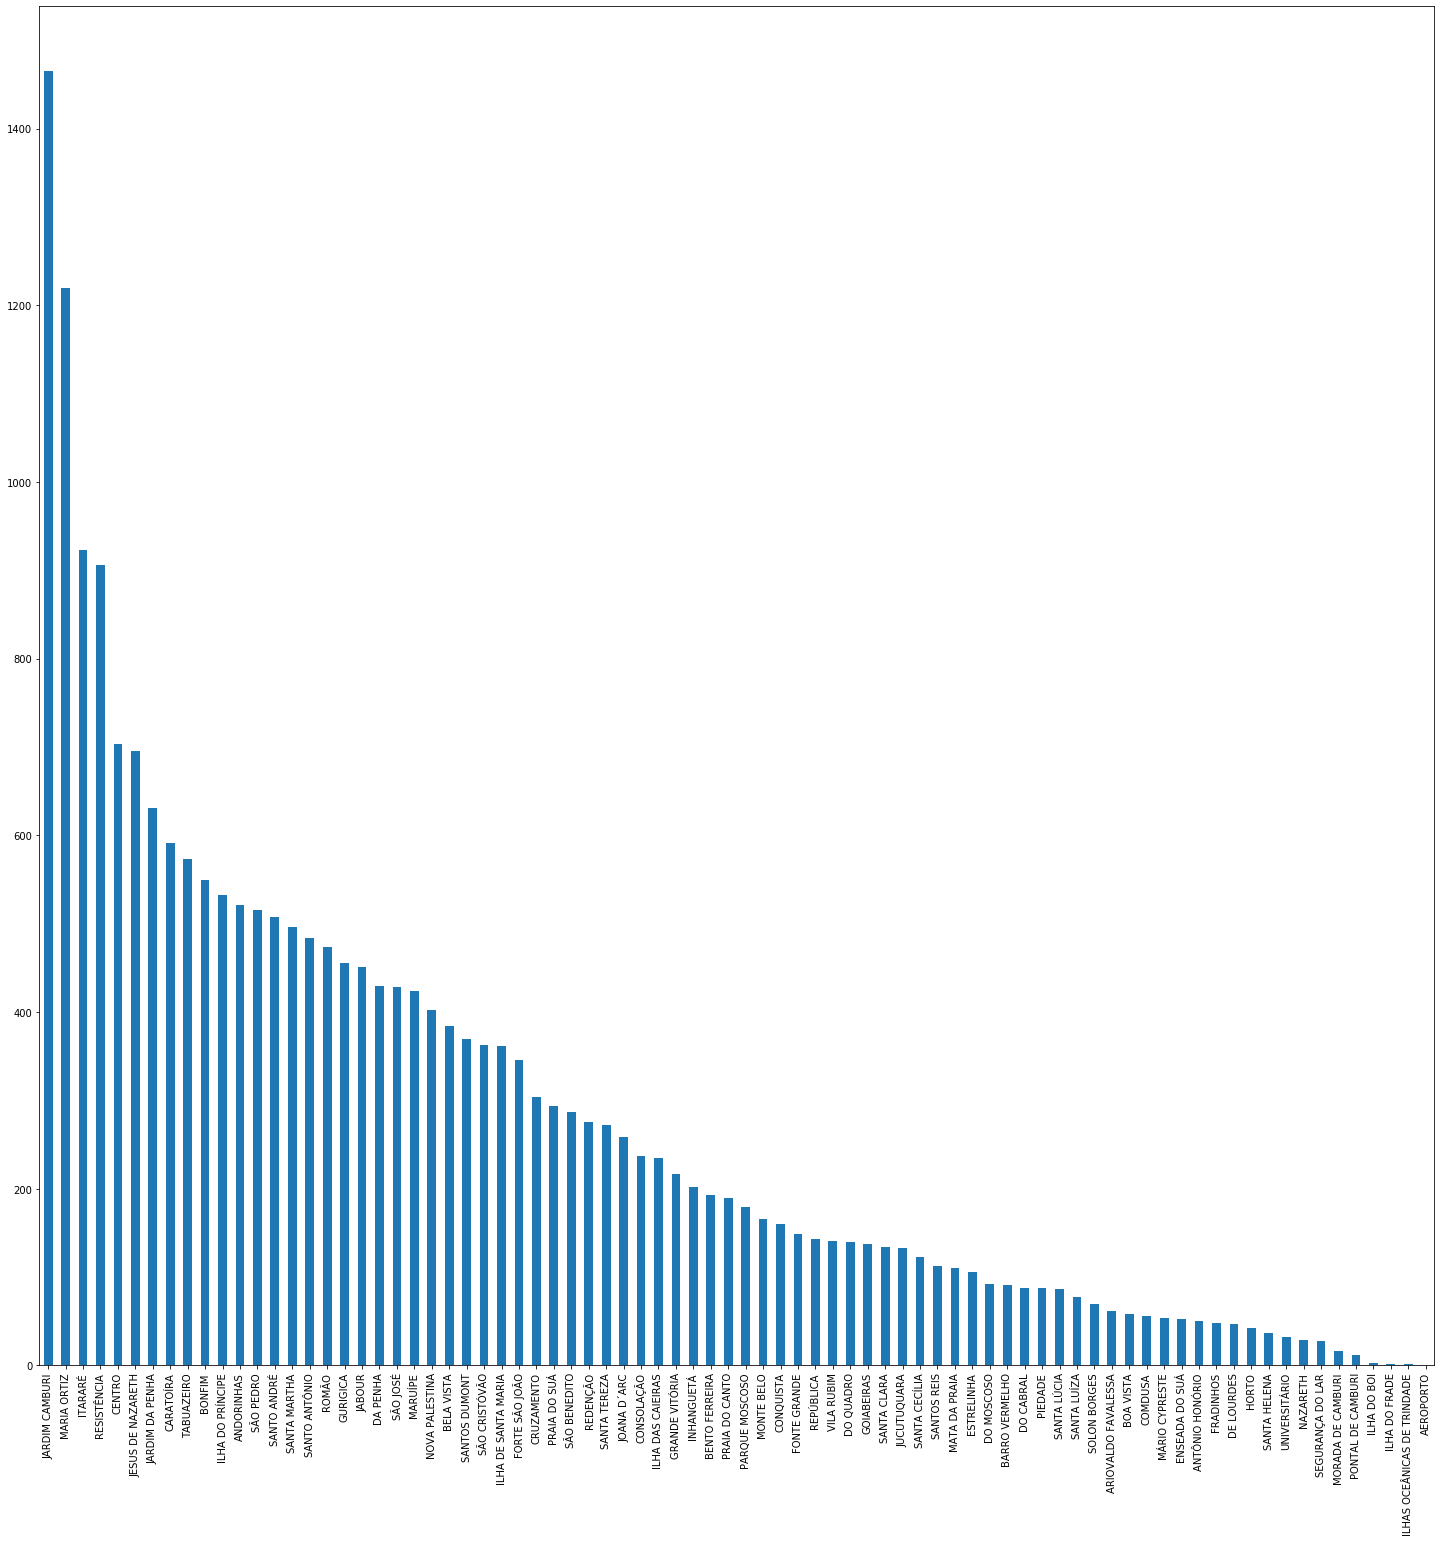

In [137]:
df_yes['Neighbourhood'].value_counts()[ind].plot(kind = 'bar', figsize=(25,25));

In [138]:
df_no['Neighbourhood'].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

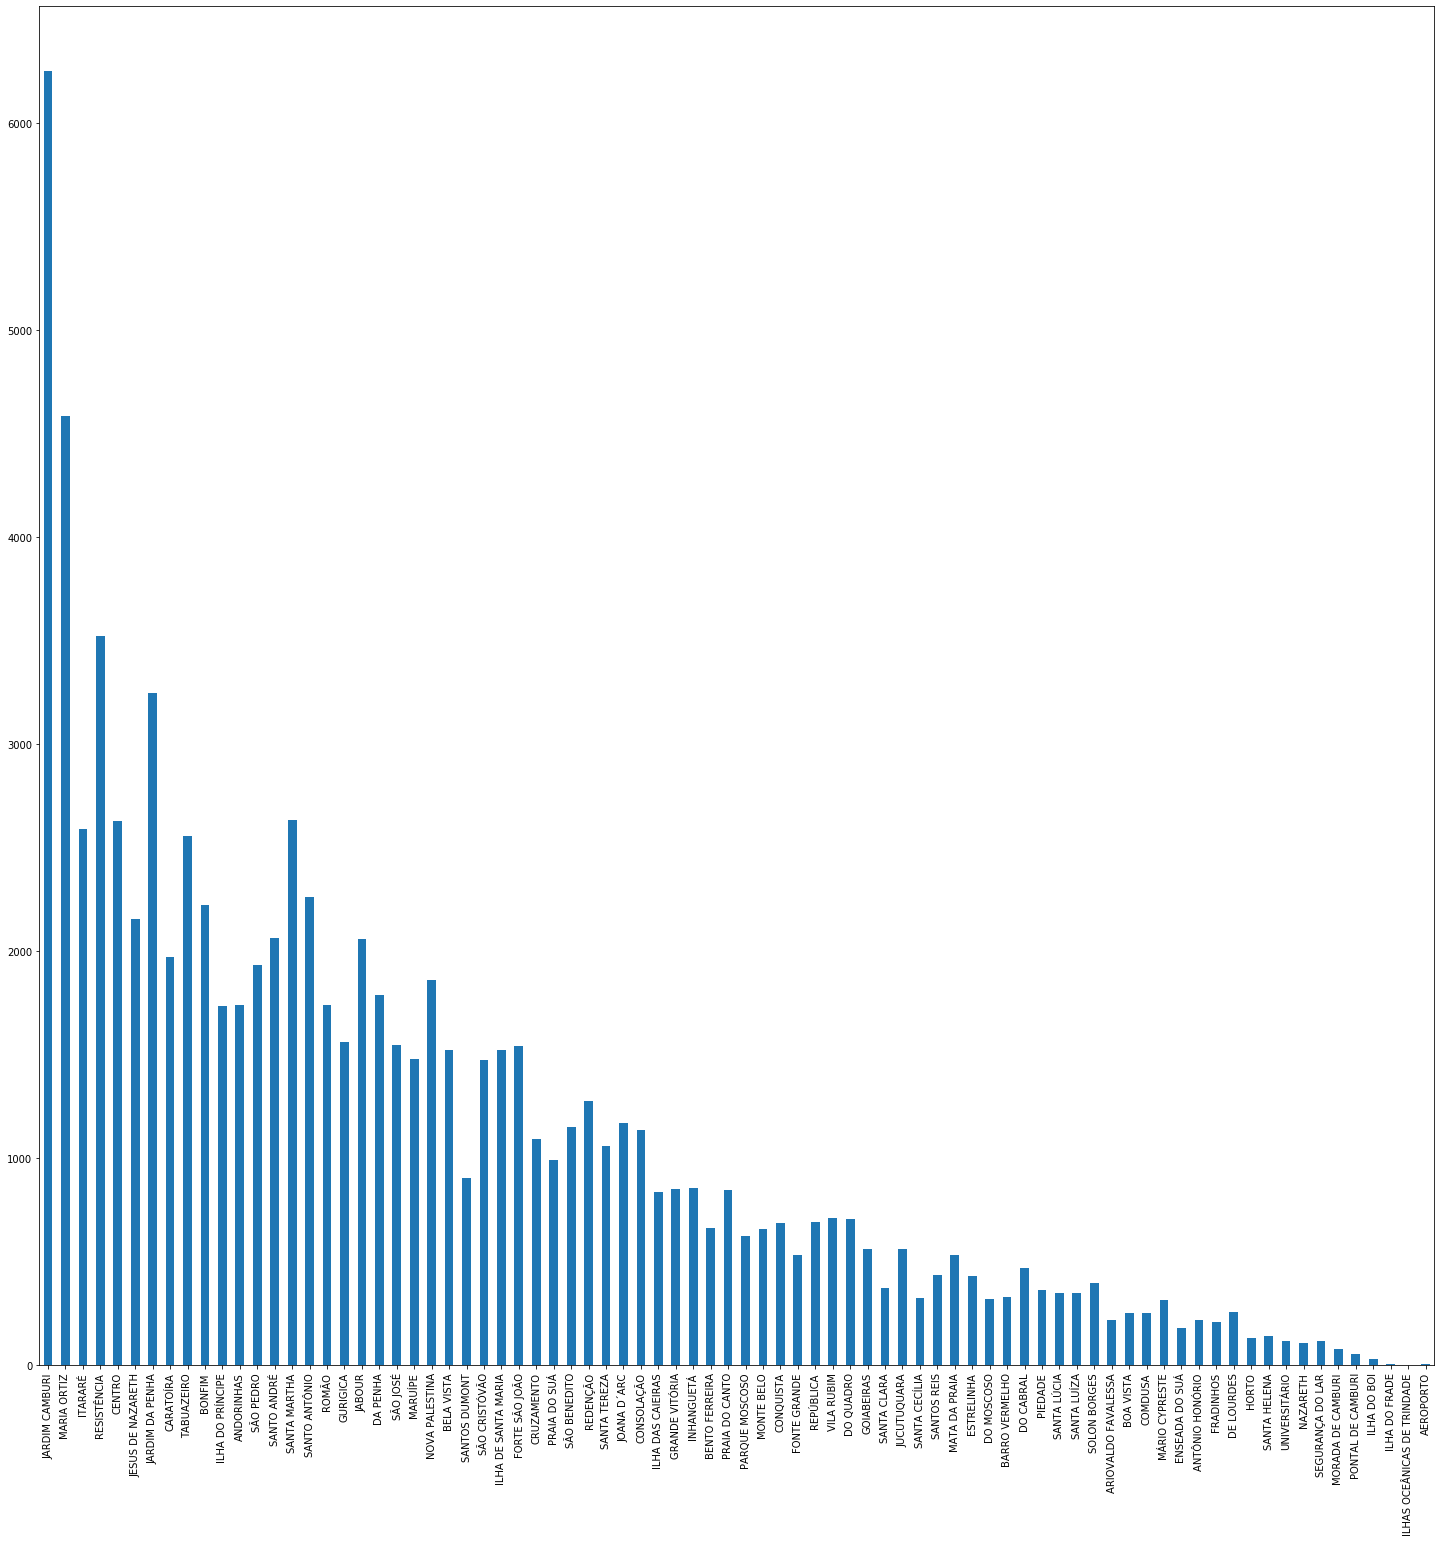

In [139]:
df_no['Neighbourhood'].value_counts()[ind].plot(kind = 'bar', figsize=(25,25));

In [140]:
df_yes['ScheduledDay'].value_counts()

2016-04-25 17:17:46+00:00    21
2016-04-25 17:18:27+00:00    20
2016-05-06 07:09:53+00:00    16
2016-04-25 17:17:23+00:00    16
2016-05-10 08:18:24+00:00    15
                             ..
2016-04-26 07:55:24+00:00     1
2016-06-06 12:26:58+00:00     1
2016-05-03 07:18:09+00:00     1
2016-04-28 15:48:27+00:00     1
2016-05-03 09:15:25+00:00     1
Name: ScheduledDay, Length: 21180, dtype: int64

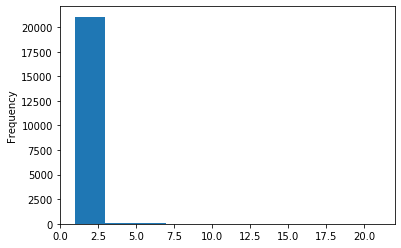

In [141]:
ind = df_yes['ScheduledDay'].value_counts().index
df_yes['ScheduledDay'].value_counts()[ind].plot(kind = 'hist');

In [142]:
df_no['ScheduledDay'].value_counts()

2016-03-29 10:44:23+00:00    11
2016-03-29 10:43:41+00:00    10
2016-05-25 09:36:45+00:00     9
2016-06-03 13:13:04+00:00     9
2016-05-06 07:09:54+00:00     9
                             ..
2016-05-19 13:07:42+00:00     1
2016-06-02 11:24:57+00:00     1
2016-06-01 07:22:55+00:00     1
2016-05-04 15:11:25+00:00     1
2016-05-04 09:41:05+00:00     1
Name: ScheduledDay, Length: 83708, dtype: int64

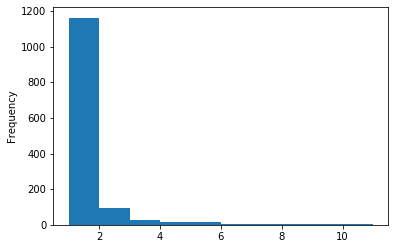

In [143]:
df_no['ScheduledDay'].value_counts()[ind].plot(kind = 'hist');

In [144]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'No_show.ipynb'])

0